In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Term 3\\MLP\\assignments\\water-treatment.csv")

In [3]:
data.head()

,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?.4,58.8,95.5,?.5,70.0,?.6,79.4,87.3,99.6
0,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
1,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
2,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
3,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5
4,D-7/3/90,38572,3.00,7.8,202,372,186,68.8,4.5,1644,...,1764,?,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100


In [4]:
data.replace("?", np.nan, inplace = True)
data.head()

,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?.4,58.8,95.5,?.5,70.0,?.6,79.4,87.3,99.6
0,D-2/3/90,39024,3.00,7.7,NaN,443,214,69.2,6.5,2660,...,2590,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100
1,D-4/3/90,32229,5.00,7.6,NaN,528,186,69.9,3.4,1666,...,1888,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
2,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
3,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5
4,D-7/3/90,38572,3.00,7.8,202,372,186,68.8,4.5,1644,...,1764,NaN,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100


In [5]:
data.fillna(data.mean())

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_22200/3231489778.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean())


,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?.4,58.8,95.5,?.5,70.0,?.6,79.4,87.3,99.6
0,D-2/3/90,39024,3.00,7.7,NaN,443,214,69.2,6.5,2660,...,2590,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100
1,D-4/3/90,32229,5.00,7.6,NaN,528,186,69.9,3.4,1666,...,1888,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
2,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
3,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5
4,D-7/3/90,38572,3.00,7.8,202,372,186,68.8,4.5,1644,...,1764,NaN,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,D-26/8/91,32723,0.16,7.7,93,252,176,56.8,2.3,894,...,942,NaN,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
522,D-27/8/91,33535,0.32,7.8,192,346,172,68.6,4.0,988,...,950,NaN,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
523,D-28/8/91,32922,0.30,7.4,139,367,180,64.4,3.0,1060,...,1136,NaN,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
524,D-29/8/91,32190,0.30,7.3,200,545,258,65.1,4.0,1260,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [17]:
df = data.dropna()

In [19]:
df.isna().sum()

D-1/3/90    0
44101       0
1.50        0
7.8         0
?           0
407         0
166         0
66.3        0
4.5         0
2110        0
7.9         0
?.1         0
228         0
70.2        0
5.5         0
2120        0
7.9.1       0
?.2         0
280         0
94          0
72.3        0
0.3         0
2010        0
7.3         0
?.3         0
84          0
21          0
81.0        0
0.02        0
2000        0
?.4         0
58.8        0
95.5        0
?.5         0
70.0        0
?.6         0
79.4        0
87.3        0
99.6        0
dtype: int64

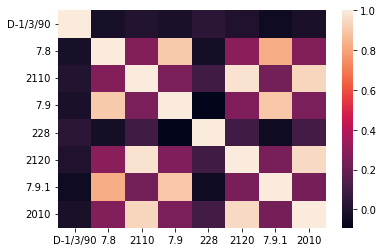

In [20]:
import seaborn as sns
sns.heatmap(data.corr());

In [21]:
data.iloc[:,0]=data.iloc[:,0].astype('category')
data.iloc[:,0]=data.iloc[:,0].cat.codes

In [22]:
df.columns = ("Date", "Q_E", "ZN_E", "PH_E", "DBO_E", "DQO_E", "SS_E",
    "SSV_E", "SED_E", "COND_E", "PH_P", "DBO_P", "SS_P", "SSV_P", "SED_P", "COND_P",
    "PH_D", "DBO_D", "DQO_D", "SS_D", "SSV_D", "SED_D", "COND_D", "PH_S", "DBO_S",
    "DQO_S", "SS_S", "SSV_S", "SED_S", "COND_S", "RD_DBO_P", "RD_SS_P", "RD_SED_P",
    "RD_DBO_S", "RD_DQO_S", "RD_DBO_G", "RD_DQO_G", "RD_SS_G", "RD_SED_G")

In [23]:
Data = df.drop(['Date'], axis = 1)

In [24]:
Data.describe()

,PH_E,COND_E,PH_P,SS_P,COND_P,PH_D,COND_D
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,7.825263,1468.431579,7.851053,257.394737,1484.618421,7.835263,1477.692105
std,0.236607,393.605113,0.223958,147.332525,398.602823,0.195243,401.094252
min,7.300000,651.000000,7.300000,104.000000,646.000000,7.300000,85.000000
25%,7.700000,1185.000000,7.700000,184.000000,1207.750000,7.700000,1213.500000
50%,7.800000,1395.500000,7.800000,220.000000,1412.500000,7.800000,1420.500000
75%,8.000000,1674.250000,8.000000,276.500000,1724.000000,8.000000,1698.750000
max,8.500000,3230.000000,8.500000,1692.000000,3170.000000,8.300000,3690.000000


In [25]:
data_corr = data.corr()
data_corr

,D-1/3/90,7.8,2110,7.9,228,2120,7.9.1,2010
D-1/3/90,1.000000,-0.021165,0.009925,-0.017649,0.032813,-0.002666,-0.049986,-0.016992
7.8,-0.021165,1.000000,0.273643,0.903016,-0.030864,0.284777,0.822266,0.266125
2110,0.009925,0.273643,1.000000,0.244653,0.092002,0.973022,0.229597,0.940009
7.9,-0.017649,0.903016,0.244653,1.000000,-0.092485,0.258494,0.894509,0.246607
228,0.032813,-0.030864,0.092002,-0.092485,1.000000,0.091080,-0.053742,0.102358
2120,-0.002666,0.284777,0.973022,0.258494,0.091080,1.000000,0.242564,0.947420
7.9.1,-0.049986,0.822266,0.229597,0.894509,-0.053742,0.242564,1.000000,0.234014
2010,-0.016992,0.266125,0.940009,0.246607,0.102358,0.947420,0.234014,1.000000


In [26]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(Data)
Data_scaled_array = scaler.transform(Data)
Data_scaled = pd.DataFrame(Data_scaled_array, columns = Data.columns)

Data_scaled.sample(5)

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,PH_P,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G
197,-1.707626,-0.450331,1.585884,2.061754,2.880452,0.451099,0.889096,0.624714,2.344440,-0.228257,...,1.898207,0.957488,-0.154511,0.646260,0.923342,0.699833,0.986782,1.029312,0.771300,0.159443
143,-0.026550,-0.489031,-0.106914,0.152890,-0.203662,0.145814,-0.407979,0.108197,-0.039257,-0.228257,...,-0.061289,-2.255674,-1.398819,-3.768765,0.490080,0.975988,0.729609,1.260524,0.705477,0.207914
274,-1.339055,-0.463231,0.316286,2.110700,1.087757,0.196695,0.817915,0.624714,-0.227511,0.665945,...,0.068997,1.044692,0.378763,0.298001,0.851131,1.071213,1.060260,1.260524,0.787756,0.207914
87,1.339882,-0.463231,-0.106914,-0.940221,-0.908846,-0.430836,-1.214696,-1.097011,-0.835519,0.665945,...,-1.218225,-0.860397,-0.595043,-1.106269,-1.242967,0.547472,-1.419627,0.055786,0.211803,0.207914
304,-0.288876,-0.738435,-0.106914,1.360206,0.586483,-0.142511,0.984004,-0.063976,-0.601474,0.218844,...,-0.952443,-1.269589,-0.826901,0.859709,0.432312,0.376066,0.435696,0.445196,-0.018578,0.207914


In [27]:
# K-Means Clustering

In [28]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(Data)
Data_scaled_array = scaler.transform(Data)
Data_scaled = pd.DataFrame(Data_scaled_array, columns = Data.columns)

Data_scaled.sample(5)

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,PH_P,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G
284,-0.470823,0.353783,0.316286,0.626027,0.696933,-0.362995,0.691371,-0.063976,1.128423,0.665945,...,1.059167,-0.571951,-0.432742,-0.207536,-0.102045,0.223705,-0.005172,0.481703,0.277626,0.110972
324,-0.235534,-0.218127,-0.953312,-1.217578,-0.925838,-0.379955,-0.732248,6.995097,-0.174088,-0.675358,...,-0.431300,-1.175676,-0.734158,0.455279,-0.506422,0.528427,-1.107345,0.238322,-0.002122,0.159443
22,0.617646,-0.463231,1.585884,0.071314,0.127689,-0.346035,0.881187,-1.475790,-0.403045,0.665945,...,-0.368763,-0.934186,-1.205604,-1.443294,0.186797,1.004555,-0.262346,0.579056,-1.203394,-1.173502
19,-0.151940,0.525785,0.316286,-1.136002,0.433551,-0.362995,0.517373,-0.236148,-0.621826,1.113046,...,-0.160306,-1.417166,-0.525485,0.646260,0.230123,0.185615,-1.750278,0.019278,-1.154027,0.207914
191,0.402670,2.417816,1.162684,0.707602,0.442047,-0.108590,0.509464,0.452542,0.299090,1.113046,...,0.931487,1.232518,0.772923,0.556386,-1.878418,-2.137891,-0.684845,-1.100277,-0.759088,0.159443


In [29]:
from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(Data_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(Data_scaled)
y_cluster_kmeans

array([0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1,

In [30]:
from sklearn import metrics
score = metrics.silhouette_score(Data_scaled, y_cluster_kmeans)
score

0.11774329172102978

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


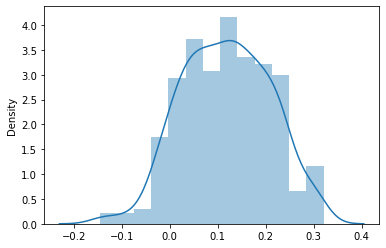

In [31]:
scores = metrics.silhouette_samples(Data_scaled, y_cluster_kmeans)
sns.distplot(scores);

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


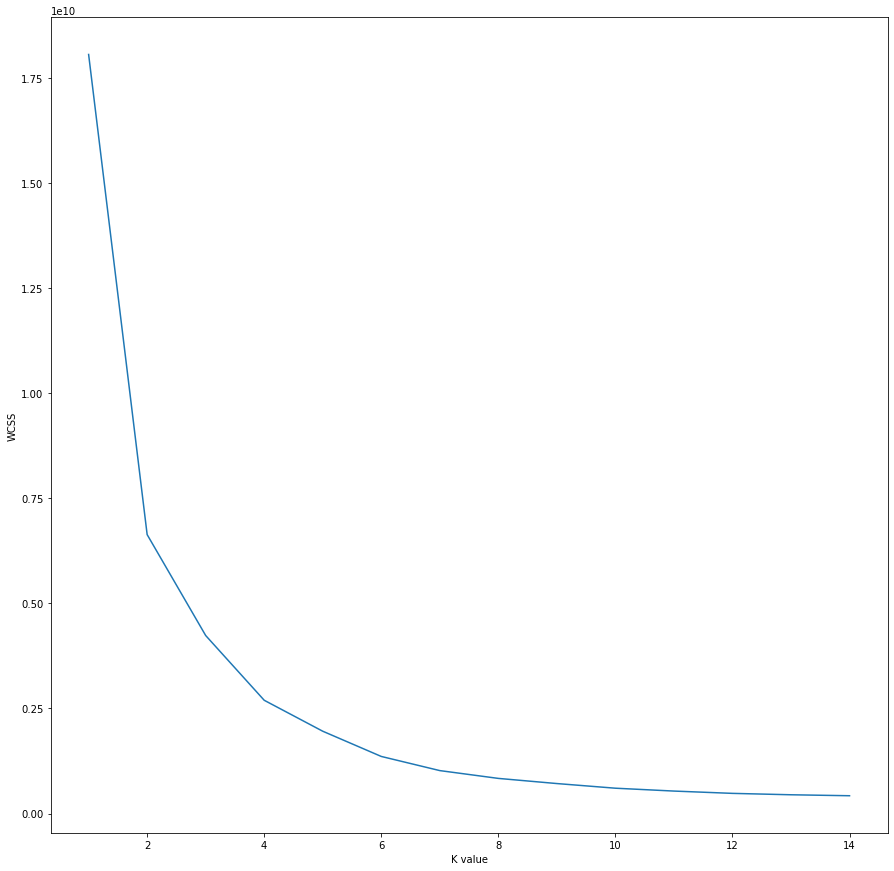

In [32]:
from sklearn.cluster import KMeans
wcss = [] 

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(Data)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (15, 15))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

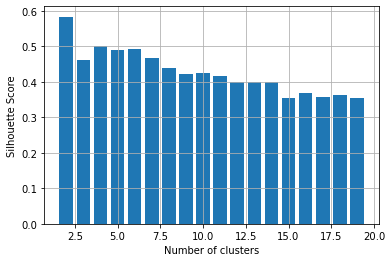

In [33]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2,20):
    silhouette_scores.append( 
        silhouette_score(Data, KMeans(n_clusters = n_cluster).fit_predict(Data))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 

In [34]:
nclusters = 2 # this is  k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(Data_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(Data_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,

In [35]:
score = metrics.silhouette_score(Data_scaled, y_cluster_kmeans)
score

0.1145792057560455

In [36]:
km.inertia_

12774.754469664273

In [37]:
km.cluster_centers_

array([[ 0.24719212, -0.04030617, -0.43330253, -0.6106138 , -0.71448849,
        -0.08420314, -0.49518481, -0.38558944, -0.60677821, -0.45034612,
        -0.69709528, -0.13767625, -0.449109  , -0.402473  , -0.62162446,
        -0.42554561, -0.81056175, -0.82041383, -0.41221341, -0.30955276,
        -0.33355254, -0.64535932,  0.01533514, -0.32379949, -0.41898739,
        -0.20274962, -0.17717443, -0.08454606, -0.58619535,  0.03984224,
         0.07436691,  0.05452064, -0.23306141, -0.17157471, -0.09641983,
        -0.12038764,  0.10564733,  0.05980891],
       [-0.16660967,  0.02716671,  0.29204972,  0.41155908,  0.48157154,
         0.05675366,  0.33375892,  0.25989068,  0.40897386,  0.30353725,
         0.46984836,  0.092795  ,  0.30270342,  0.27127035,  0.41898036,
         0.28682149,  0.54632576,  0.55296615,  0.27783547,  0.20864129,
         0.22481735,  0.43497787, -0.01033602,  0.21824371,  0.28240119,
         0.13665503,  0.11941713,  0.05698479,  0.39510083, -0.02685402,
   

In [38]:
Data.head()

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,PH_P,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G
2,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
7,29156,2.50,7.7,206,451,194,69.1,4.5,1249,7.7,...,1338,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4
8,39246,2.00,7.8,172,506,200,69.0,5.0,1865,7.8,...,1616,21.2,59.7,90.8,88.4,66.1,89.0,69.0,86.5,99.6
9,42393,0.70,7.9,189,478,230,67.0,5.5,1410,8.1,...,1575,0.6,45.8,92.0,11.6,25.7,19.6,36.0,43.0,36.4
13,40923,3.50,7.6,146,329,188,57.4,2.5,1300,7.6,...,1545,32.7,33.3,90.0,82.6,61.3,87.0,71.4,78.2,99.2


In [39]:
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(Data_scaled)
Data_scaled["type"] = clusters
Data_scaled["type"].unique()

array([0, 1])

In [40]:
Data_scaled.head()

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,PH_P,...,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G,type
0,-0.343241,0.525785,0.316286,0.250780,1.563544,-0.295154,0.375011,-0.063976,2.446198,-0.228257,...,-0.404249,0.409678,0.522684,0.461196,0.347498,0.123414,0.481703,-0.002122,0.207914,0
1,-1.200658,0.095778,-0.530113,0.267095,0.399567,-0.278193,0.651826,-0.063976,-0.558227,-0.675358,...,0.467799,-1.182418,0.208128,0.215681,-0.995183,0.490805,-0.552668,0.096613,0.062502,1
2,0.273919,-0.119225,-0.106914,-0.287618,0.866857,-0.227313,0.643917,0.108197,1.008857,-0.228257,...,-1.202508,0.061890,0.017147,0.620058,-0.242901,-0.097020,-1.136784,-0.512251,0.110972,0
3,0.733829,-0.678234,0.316286,-0.010261,0.628963,0.027092,0.485737,0.280369,-0.148648,1.113046,...,-2.584369,-1.012388,0.151957,-10.471443,-4.090017,-12.845477,-5.152580,-7.670518,-15.205776,0
4,0.519000,0.525785,-0.953312,-0.711810,-0.636968,-0.329074,-0.273526,-0.752666,-0.428484,-1.122459,...,-0.431081,-1.978466,-0.072726,-0.217581,-0.699984,-0.464411,-0.844726,-1.878081,0.014031,1


In [41]:
Data_scaled.describe()

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,PH_P,...,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G,type
count,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,...,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,380.000000
mean,-1.744219e-16,1.788043e-16,-6.474353e-16,1.322042e-17,-1.899066e-16,8.881784e-17,7.086437e-16,-3.126154e-17,-2.392823e-16,-4.972630e-15,...,-7.945034e-17,-6.261074e-16,-1.107301e-16,2.449795e-16,-2.391362e-16,1.236004e-15,-1.468416e-15,-3.717239e-16,-1.752399e-15,0.447368
std,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,...,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,0.497878
min,-3.992855e+00,-9.362385e-01,-2.222910e+00,-2.310688e+00,-2.540113e+00,-1.092287e+00,-3.769301e+00,-1.475790e+00,-2.079519e+00,-2.463761e+00,...,-2.584369e+00,-3.601477e+00,-9.318439e+00,-1.047144e+01,-4.090017e+00,-1.284548e+01,-5.152580e+00,-7.670518e+00,-1.520578e+01,0.000000
25%,-6.398366e-01,-5.922328e-01,-5.301128e-01,-6.791798e-01,-6.794487e-01,-4.986771e-01,-4.455468e-01,-5.116242e-01,-7.210406e-01,-6.753577e-01,...,-6.725715e-01,-6.433467e-01,-2.300046e-01,-3.331175e-01,-4.428745e-01,-2.853079e-01,-4.918229e-01,-2.654145e-01,3.826636e-02,0.000000
50%,-1.870873e-01,-3.342286e-01,-1.069135e-01,-1.081518e-01,-3.373879e-02,-2.612331e-01,2.128768e-01,-6.397568e-02,-1.855355e-01,-2.282568e-01,...,3.177503e-02,6.961861e-02,2.980008e-01,2.156808e-01,1.380020e-01,1.417838e-01,1.348846e-01,2.118033e-01,1.352078e-01,0.000000
75%,6.144674e-01,3.107819e-01,7.394851e-01,5.811605e-01,5.631181e-01,1.330936e-01,6.913708e-01,2.803693e-01,5.235953e-01,6.659450e-01,...,7.159974e-01,6.821119e-01,6.013231e-01,5.767322e-01,6.284141e-01,5.459135e-01,7.007468e-01,5.902863e-01,2.079139e-01,1.000000
max,3.318797e+00,7.233895e+00,2.855482e+00,4.052195e+00,4.562696e+00,8.490276e+00,1.893538e+00,1.078289e+01,4.481372e+00,2.901450e+00,...,2.681460e+00,2.766907e+00,1.050689e+00,1.529908e+00,2.680527e+00,1.372543e+00,2.404418e+00,1.478899e+00,2.079139e-01,1.000000


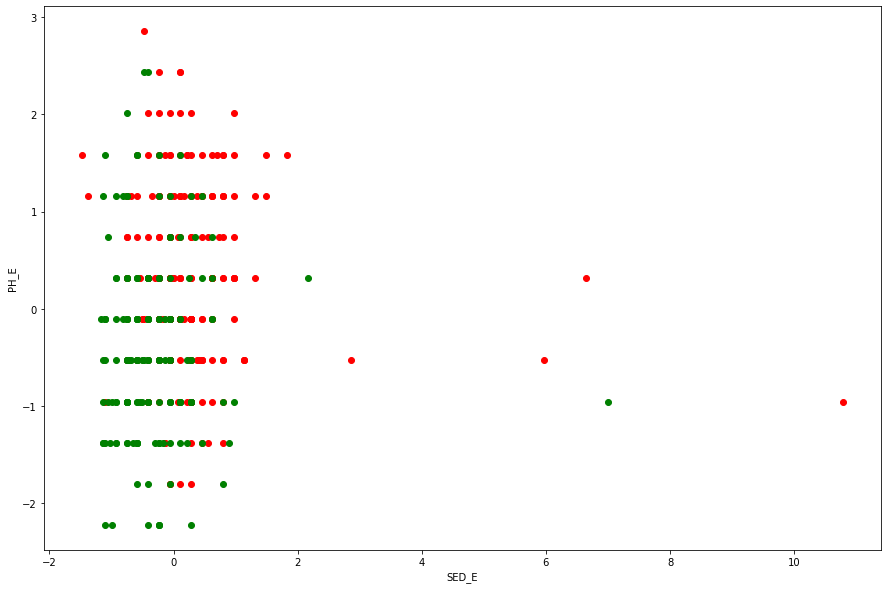

In [42]:
plt.figure(figsize = (15, 10))
plt.scatter(Data_scaled["SED_E"][Data_scaled["type"] == 0], Data_scaled["PH_E"][Data_scaled["type"] == 0], color = "red")
plt.scatter(Data_scaled["SED_E"][Data_scaled["type"] == 1], Data_scaled["PH_E"][Data_scaled["type"] == 1], color = "green")
plt.xlabel('SED_E')
plt.ylabel('PH_E')
plt.show()

In [43]:
# K-means++

In [44]:
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,15):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(Data)
    wcss.append(kmeans.inertia_)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


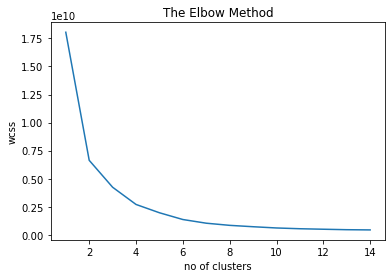

In [45]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [46]:
#Model Build   (K-means)
kmeansmodel = KMeans(n_clusters= 5, random_state=0)
y_kmeans= kmeansmodel.fit_predict(Data)

In [47]:
score = metrics.silhouette_score(Data, y_kmeans)
score

0.4893714316828735

In [48]:
# Agglomerative Clustering

In [49]:
Data.head()

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,PH_P,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G
2,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
7,29156,2.50,7.7,206,451,194,69.1,4.5,1249,7.7,...,1338,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4
8,39246,2.00,7.8,172,506,200,69.0,5.0,1865,7.8,...,1616,21.2,59.7,90.8,88.4,66.1,89.0,69.0,86.5,99.6
9,42393,0.70,7.9,189,478,230,67.0,5.5,1410,8.1,...,1575,0.6,45.8,92.0,11.6,25.7,19.6,36.0,43.0,36.4
13,40923,3.50,7.6,146,329,188,57.4,2.5,1300,7.6,...,1545,32.7,33.3,90.0,82.6,61.3,87.0,71.4,78.2,99.2


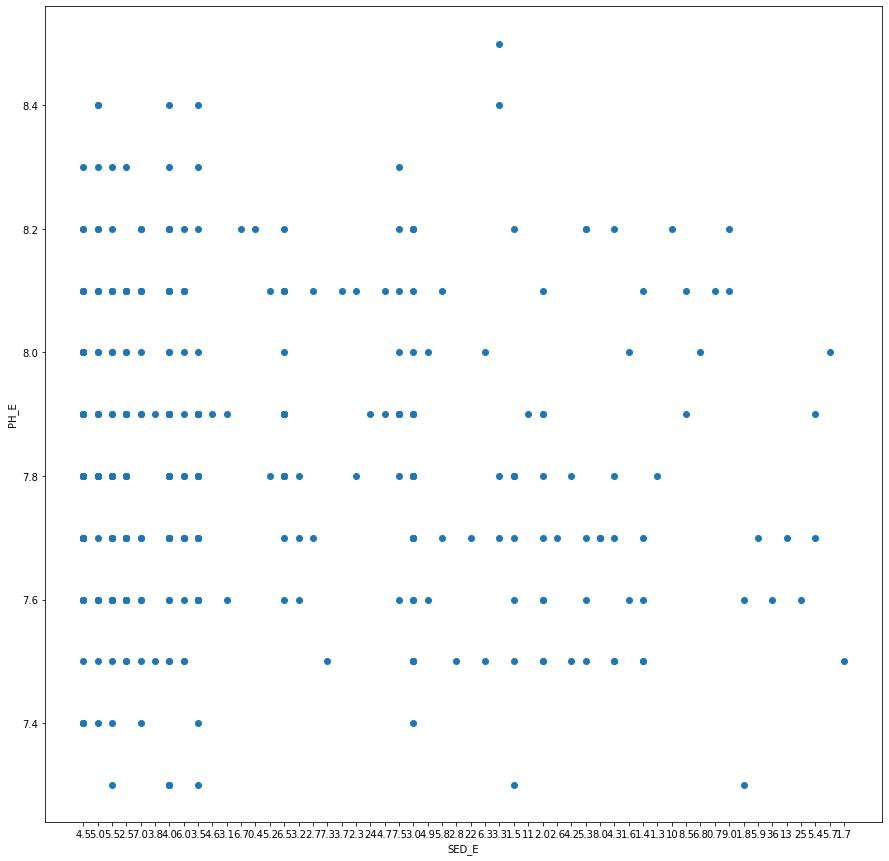

In [50]:
plt.figure(figsize = (15, 15))
plt.scatter(df["SED_E"], df["PH_E"])
plt.xlabel('SED_E')
plt.ylabel('PH_E')
plt.show()

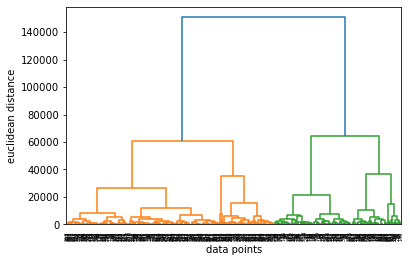

In [51]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(Data, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [52]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(Data)
Data["label"] = cluster

In [60]:
Data.label.value_counts()

0    236
2     88
1     56
Name: label, dtype: int64

In [54]:
dataWithoutTypes= Data[['SED_E','PH_E']]

In [55]:
dataWithoutTypes.head()

,SED_E,PH_E
2,4.5,7.9
7,4.5,7.7
8,5.0,7.8
9,5.5,7.9
13,2.5,7.6


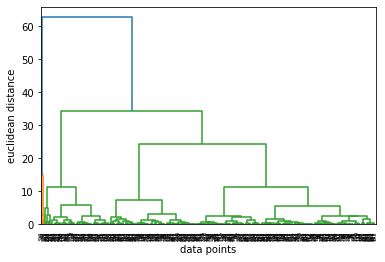

In [56]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(dataWithoutTypes, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [57]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(dataWithoutTypes)
dataWithoutTypes["label"] = cluster

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_22200/230543039.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWithoutTypes["label"] = cluster


In [58]:
dataWithoutTypes.label.value_counts()

0    376
1      4
Name: label, dtype: int64

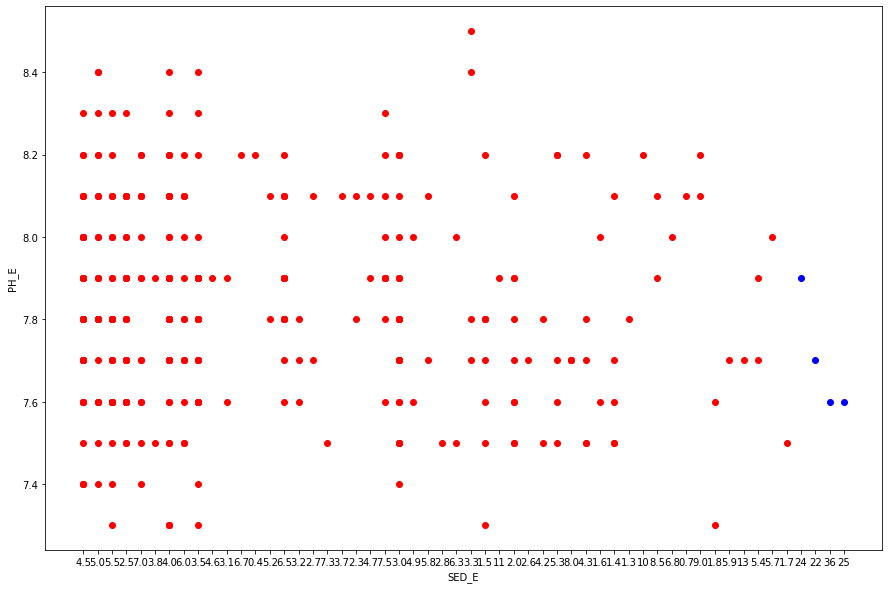

In [59]:
# Data after hierarchical clustering

plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutTypes["SED_E"][dataWithoutTypes.label == 0], dataWithoutTypes["PH_E"][dataWithoutTypes.label == 0], color = "red")
plt.scatter(dataWithoutTypes["SED_E"][dataWithoutTypes.label == 1], dataWithoutTypes["PH_E"][dataWithoutTypes.label == 1], color = "blue")
plt.xlabel("SED_E")
plt.ylabel("PH_E")
plt.show()